In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('emaze_follows.csv')

In [3]:
df.head()

followId                            FollowerId  \
0        11  87E2923A-FD01-43AC-8369-864081916F83   
1        20  371088ec-ccd9-4c1e-acb3-6c3b43c84627   
2        21  24f13669-d3c4-431b-ae72-7c445aec412c   
3        22  a328005f-1ca5-4c79-961f-4eab118a32ab   
4        23  a328005f-1ca5-4c79-961f-4eab118a32ab   

                           InfluencerId  
0  8E665D3B-F5CD-48D2-8103-4B74B79A405F  
1  f7e6dd70-1b33-4d36-916b-c31e655555b5  
2  f7e6dd70-1b33-4d36-916b-c31e655555b5  
3  b0871e46-0322-4934-9b04-49dcf3ce3130  
4  bce93b7e-f594-4117-a354-1051f10fd56c

In [4]:
df[df['FollowerId']==df['InfluencerId']].head().reset_index()

index  followId                            FollowerId  \
0     16        39  cb62b2ec-feb4-41e8-a82c-511f7f068acc   
1     17        40  47dc074b-c445-4cab-b2e2-fdeff0ca852e   
2     18        41  f0a80b4a-ab7f-44a1-9528-d0acb6708f58   
3     19        47  a726ee53-0c95-4659-b2c7-82d14fc5cb77   
4     23        58  c0af29d2-85da-4d15-9ccf-7a80c86d6bb9   

                           InfluencerId  
0  cb62b2ec-feb4-41e8-a82c-511f7f068acc  
1  47dc074b-c445-4cab-b2e2-fdeff0ca852e  
2  f0a80b4a-ab7f-44a1-9528-d0acb6708f58  
3  a726ee53-0c95-4659-b2c7-82d14fc5cb77  
4  c0af29d2-85da-4d15-9ccf-7a80c86d6bb9

In [5]:
df = df[df['FollowerId']!=df['InfluencerId']]
df.index = np.arange(0, len(df))

In [6]:
df = df.drop(columns = ['followId'])

In [7]:
df['FollowerId'] = df['FollowerId'].astype('category').cat.codes
df['InfluencerId'] = df['InfluencerId'].astype('category').cat.codes

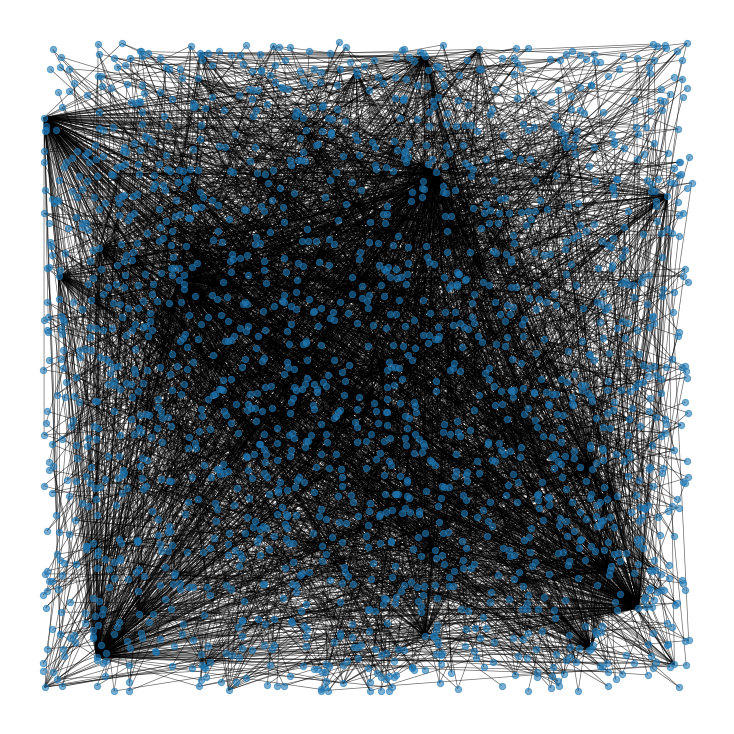

In [8]:
G = nx.from_pandas_edgelist(df, 'FollowerId', "InfluencerId", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [9]:
follower_list = df['FollowerId'].values
influencer_list = df['InfluencerId'].values

final_list = follower_list+influencer_list
# remove duplicate items from the list
final_list = list(dict.fromkeys(final_list))

# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = final_list)

In [16]:
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(df['FollowerId'].unique().tolist()):
    for j in df['InfluencerId'].unique().tolist():
        if i != j:
            try:
                if nx.shortest_path_length(G, i, j) <=2:
                    if adj_G[i,j] == 0:
                        all_unconnected_pairs.append([i, j])

            except nx.NetworkXNoPath:
                pass
offset = offset + 1


100%|██████████| 1876/1876 [01:48<00:00, 16.98it/s]

In [17]:
df[df['FollowerId']==972]

FollowerId  InfluencerId
0         972           869

In [18]:
follower_unlinked = [i[0] for i in all_unconnected_pairs]
influencer_unlinked = [i[1] for i in all_unconnected_pairs]
data = pd.DataFrame({'FollowerId':follower_unlinked, 
                     'InfluencerId':influencer_unlinked})

# add target variable 'link'
data['link'] = 0

In [19]:
len(all_unconnected_pairs)/(len(df['FollowerId'].unique())*len(df['InfluencerId'].unique()))

0.11373382817384613

In [20]:

initial_node_count = len(G.nodes)

df_temp = df.copy()

omissible_links_index = []

initial_connected_components = nx.number_connected_components(G)

for i in tqdm(df.index.values):
  
  # remove a node pair and build a new graph
    G_temp = nx.from_pandas_edgelist(df_temp.drop(index = i), "FollowerId", "InfluencerId", create_using=nx.Graph())

    # check there is no spliting of graph and number of nodes is same
    if (nx.number_connected_components(G_temp) == initial_connected_components) and (len(G_temp.nodes) == initial_node_count):
        omissible_links_index.append(i)
        df_temp = df_temp.drop(index = i)


100%|██████████| 4161/4161 [00:54<00:00, 76.47it/s] 

In [21]:
omissible_links_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 159,
 160,
 161,
 163,
 164,
 166,
 167,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208

In [22]:
df_removable = df.loc[omissible_links_index]

# add the target variable 'link'
df_removable['link'] = 1
print(data)
data = data.append(df_removable[['FollowerId', 'InfluencerId', 'link']], ignore_index=True)


        FollowerId  InfluencerId  link
0              972           869     0
1              972          1580     0
2              972           965     0
3              972          1474     0
4              408           869     0
5              408          1552     0
6              408          1096     0
7              408          1178     0
8              408           410     0
9              408          1362     0
10             408          1406     0
11             408          1291     0
12             408           398     0
13             408           321     0
14             408          1032     0
15             408           101     0
16             408          1220     0
17             408          1301     0
18             408           386     0
19             408           167     0
20             408           245     0
21             408           890     0
22             408           856     0
23             408           828     0
24             408       

In [23]:
data['link'].value_counts()

0    340530
1      2286
Name: link, dtype: int64

### Classes are heavily unbalanced. A model that predicts 0 for all will also do pretty good = need to change this
#### We try downsampling the observations from the majority class that is 0

Otherwise we get high precision low recall due to the fact that the false positives outweigh the true positives just because we have way to many 0s and lesser ones

To be honest, False positives for us are cheap and itll get better as the graph becomes more and more connected. We can roll with this or try more techniques to do something

In [24]:
#downsampling to randomly remove observations from the majority class to make the dataset even
#ask connor: can model miss relationships here due to avoided observations? Is there a less random way to remove
#observations?

from sklearn.utils import resample
# Separate majority and minority classes
data_majority = data[data.link==0]
data_minority = data[data.link==1]
 
data_majority_downsampled = resample(data_majority, 
                                 replace=False,    # no replacement
                                 n_samples=3000,     # close to the minority class
                                 random_state=42)
 
data_downsampled = pd.concat([data_majority_downsampled, data_minority])
 
# Display new class counts
data_downsampled.link.value_counts()

0    3000
1    2286
Name: link, dtype: int64

In [25]:
df_partial = data.drop(index = df_removable.index.values)
try:
    df_partial_downsampled = data_downsampled.drop(index=df_removable.index.values)
except KeyError:
    pass
# build graph
G_data = nx.from_pandas_edgelist(df_partial, "FollowerId", "InfluencerId", create_using=nx.Graph())

In [26]:
!pip install node2vec

In [27]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)


Generating walks (CPU: 1): 100%|██████████| 50/50 [02:01<00:00,  2.61s/it]

In [28]:
x_1 = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data_downsampled['FollowerId'], data_downsampled['InfluencerId'])]
x_2 = [((n2w_model[str(i)]+n2w_model[str(j)])/2) for i,j in zip(data_downsampled['FollowerId'], data_downsampled['InfluencerId'])]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x_1), data_downsampled['link'], 
                                                test_size = 0.20, 
                                                random_state = 42)

In [31]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = lr.predict(x_test)

In [33]:
roc_auc_score(y_test, pred)


0.8461942410362634

In [40]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
confusion_matrix(y_test, pred)

array([[510,  94],
       [ 69, 385]])

In [41]:
accuracy_score(y_test, pred)

0.8459357277882797

In [42]:
from sklearn.model_selection import cross_val_score


In [44]:
cv_score = cross_val_score(lr, x_train, y_train, cv = 3, scoring = 'roc_auc')

In [45]:
cv_score

array([0.89890698, 0.88933282, 0.88169399])

High recall but low precision = unbalanced classes is probably making this way worse 

In [49]:
acc_df = pd.DataFrame()
acc_df['ytest'] = y_test
acc_df['pred'] = pred
acc_df.head()

ytest  pred
246919      0     0
340689      1     1
180901      0     0
333940      0     0
342035      1     1

In [46]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.8037578288100209